# Domača Naloga 3

## Naloga 1: Nenadzorovano učenje

1.a: Podane imaš tri dendrograme narejena na istih podatkih z različnimi merami med množicami. Določi kateri dendrogram pripada hierarhičnemu razvrščanju s celovito razdaljo med primeri in svojo izbiro pojasni.

![alt text](linkages.png)

Izbrala bi levi dendrogram, ker najbolj ustreza značilnostim hierarhičnega razvrščanja s celovito razdaljo med množicami. Kaže, da se gruče združujejo šele, ko so vse točke dovolj blizu, kar je značilno za celovito razdaljo, kjer se upošteva največja razdalja med točkami iz različnih gruč. Vidimo tudi, da so visoke združitve na vrhu dendrograma, torej algoritem je dolgo čakal z zduževanjem, kar je prav tako značilno za celovito povezovanje. Vidimo tudi, da so gruče pred združitvijo kompaktne, torej da so vse točke v gručah relativno blizu, kar je tudi značilnost razvrščanja s celovito razdaljo.

1.b: Podana imaš dva grafa, na katerih sta prikazana rezultata gručenj. En graf je pridelan s celovito razdaljo med primeri in drugi z enojno razdaljo med primeri. Določi, kateri graf je kateri in svojo izbiro pojasni.

![alt text](clustering_distance_choice.png)

Levi graf je pridelan z enojno, desni pa s celovito razdaljo.

Za Method Alpha sklepamo, da je bila uporabljena enojna razdalja, saj je skoraj vse točke združila v eno gručo, samo ena točka je ostala ločena. To se pogosto zgodi pri razvrščanju z enojno razdaljo, kjer se točke verižijo, ker se združujejo glede na najbližjo razdaljo, ne glede na to, kako razpršene so ostale točke v gruči.
Za Method Beta pa velja, da je rezultat razvrščanja s celovito razdaljo, saj sta gruči jasno ločeni in bolj kompaktni. Takšne rezultate pričakujemo pri celoviti razdalji, kjer se gruče združujejo le, če so tudi njihove najbolj oddaljene točke dovolj blizu. To preprečuje nastanek velikih, razpotegnjenih gruč.

1.c: Podan imaš graf s podatki in dendrogram narejen z hierarhičnim razvrščanje in enojno razdaljo med primeri. Iz slike razberi labelo/indeks podatka, ki je na grafu pobarvan z violično barvo (koordinate cca (-2.5, 7.5)) in svojo izbiro pojasni.

![alt text](identify.png)

Na levem grafu je vijolična točka jasno blizu skupine rdečih točk, ki pa so izolirane od ostalih skupin. Te rdeče točke tvorijo eno gosto gručo, skupaj z vijolično točko. Ta skupina torej ustreza zeleno obarvanemu delu dendrograma in se pozno priključi ostalim skupinam (ker je daleč stran, kar je tudi značilnost razvrščanja z enojno razdaljo). Znotraj te zelene gruče pa imamo levi del, kjer se 6 točk združi hitro, kar ustreza grafičnemu prikazu na levi, in ostaneta le še 2 točki z indeksoma 4 in 28, ki sta pridruženi postopoma. Indeks 4 se prej priključi gruči rdečih točk, torej bo on ustrezal vijolični točki iz levega grafa.

1.d: Osredotoči se na gruči z rdečimi in bež točkami. Pri približno kakšni razdalji se bosta gruči združili, če pri gručenju izbereš enojno razdaljo med primeri? Če bi namesto enojne razdalje uporabil celovito in zakaj?

![alt text](cluster.png)

ENOJNA RAZDALJA: rdeča in bež se združita, ko bo najbližji par točk med rdečo in bež bližje kot katerikoli drugi par med še neločenimi gručami. Na sliki vidimo, da je ena rdeča točka (skrajna desna rdeča točka) zelo blizu leve bež točke, razdalja izgleda približno 1.5 enote. To pomeni, da se bosta gruči združili, ko bo razdalja med njima postala najmanjša med vsemi pari gruč, torej približno pri razdalji 1.5 enot.

CELOVITA RAZDALJA: upošteva se največja razdalja med poljubnimi pari točk iz obeh gruč. Do združitve zdaj pride pri večji razdalji, in sicer pri približno 9 enotah. 


1.e: Dani so dendrogrami narejeni z različnimi razdaljami med množicami nad istimi podatki. Določi število gruč in pojasni, kako si se za to odločil/a.

![alt text](num_clusters.png)

Če najprej pogledamo levi dendrogram, sta najdaljši veji na razdalji med 4 in 8, in če dendrogram tam razrežemo, dobimo dve gruči. 
Pri srednjem dendrogramu lahko režemo na razdalji med 15 in 20, kar nam da dve gruči, ali na razdalji od 10 naprej, kar nam pa da tri gruče. Vendar pa se za drugo možnost pri srednjem dendrogramu ne bomo odločili, saj so potem podatki že manj raznoliki, kot so bili pri dveh gručah. 
Pri desnem dendrogramu podobno kot pri levem režemo na razdalji nad 8 in spet dobimo dve gruči.

Na podlagi teh treh dendrogramov bi rekla, da imamo dve gruči.

## Naloga 2: Linearna diskriminantna analiza

Na vajah smo si pogledali PCA, ki podatke preslika v prostor z nižjo dimenzijo in ob tem ohranja čim več variance, ki se pojavi v podatkih. Videli smo, da tak pristop dobro zniža dimenzijo podatkov, a nam s tem ne nujno pomaga pri klasifikaciji. Zato si bomo sedaj pogledali še soroden pristop LDA (Linearna Diskriminantna Analiza), ki poišče najbolj optimalno (linearno) predstavitev podatkov za klasifikacijo.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

2.a: Najprej moramo poiskati povprečne vrednosti za vsak razred. Dopolni funkcijo "mean_vectors", ki sprejme podatke (X) in ciljne vrednosti (y) ter vrne slovar povprečnih vrednosti za vsak razred in povprečno vrednost vseh podatkov.

In [26]:
def mean_vectors(X, y):
    classes = np.unique(y)
    class_means = {}
    for c in classes:
        class_means[c] = np.mean(X[y == c], axis=0)
    overall_mean = np.mean(X, axis=0)
    return class_means, overall_mean


points_a = np.random.normal(0, 1, (100, 2))
points_b = np.random.normal(1, 1, (100, 2))
points = np.vstack((points_a, points_b))
labels = np.array([0] * 100 + [1] * 100)
class_means, overall_mean = mean_vectors(points, labels)
for i in range(2):
    print(f"Class Mean {i}:", class_means[i])
print("Overall Mean:\n", overall_mean)


Class Mean 0: [-0.14714647 -0.04711031]
Class Mean 1: [0.81701473 1.0846478 ]
Overall Mean:
 [0.33493413 0.51876875]


2.b: Podano imaš podatkovno množico slik s števkami. Za vse in vsako števko posebaj poišči povprečno vrednost ter jih vizualiziraj. Se dobljena povprečja skladajo s števkami, ki jih predstavljajo?

In [27]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data
y = mnist.target.astype(np.int64)
X = X / 255.0

n_samples_subset = 10000
X_subset, X_test, y_subset, y_test = train_test_split(X, y, train_size=n_samples_subset, stratify=y, random_state=42)
X_train = X_subset
y_train = y_subset

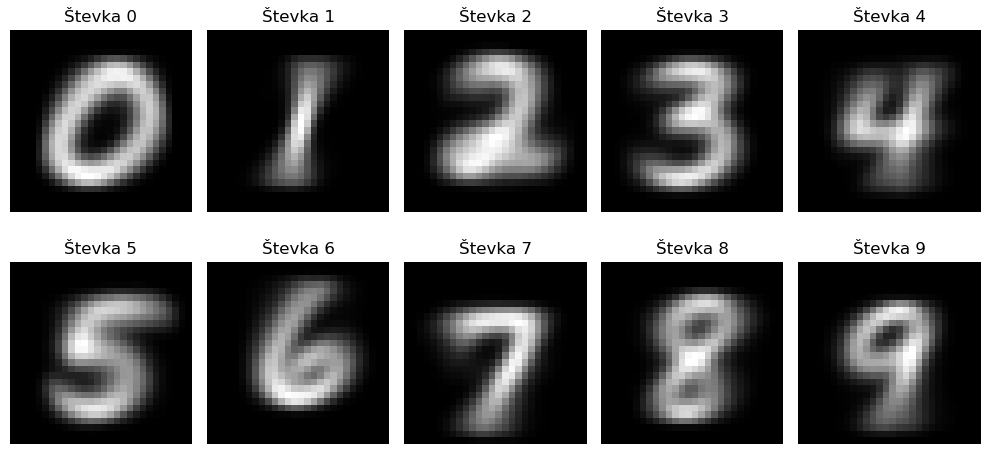

In [28]:
class_means, overall_mean = mean_vectors(X_train, y_train)

# povprečne slike za vsako števko
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(class_means[i].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"Števka {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


2.c: Sedaj moramo poiskati matriko razpršenosti znotraj razredov $S_W$ in matriko razpršenosti (matriko razlik med razredi) $S_B$. Matriko razpršenosti izračunamo s formulo $\sum_{i=1}^k\sum_{j \in N_i} (x_j - c^{(i)})(x_j = c^{(i)})^T$ in matriko razpršenosti s formulo $\sum_{i=1}^k n_i (c^{(i)}-c)(c^{(i)}-c)^T$. V formulah $k$ predstavlja število razredov, $N_i$ indeksno množico podatkov razreda $i$, $c^{(i)}$ povprečno vrednost podatkov razreda $i$, $c$ povprečno vrednost vseh podatkov in $n_i$ število podatkov s ciljno vrednostjo $i$.

Dopolni funkciji "within_class_scatter" in "between_class_scatter".

In [29]:
def within_class_scatter(X, y, class_means):
    S_W = np.zeros((X.shape[1], X.shape[1]))  # začetna matrika dimenzije (784, 784)
    for cls in np.unique(y):
        class_data = X[y == cls]
        mean_vec = class_means[cls].reshape(-1, 1)  # (784, 1)
        for x in class_data:
            x = x.reshape(-1, 1)  # (784, 1)
            S_W += (x - mean_vec) @ (x - mean_vec).T
    return S_W

def between_class_scatter(X, y, class_means, overall_mean):
    S_B = np.zeros((X.shape[1], X.shape[1]))  # tudi (784, 784)
    overall_mean = overall_mean.reshape(-1, 1)
    for cls in np.unique(y):
        n = np.sum(y == cls)
        mean_vec = class_means[cls].reshape(-1, 1)
        S_B += n * (mean_vec - overall_mean) @ (mean_vec - overall_mean).T
    return S_B

Osrednji del algoritma LDA je iskanje (lastnih) vektorjev, ki maksimizirajo razmerje med razpršenostjo med razredi in razpršenostjo znotraj razreda. Te lahko najdemo tako, da rešimo enačbo $S_B v = \lambda S_W$, oziroma najdemo lastne vrednosti in lastne vektorje za matriko $S_W^{-1}S_B$. Ker je ta matrika lahko singularna, matriki S_W pred inverzom ponavadi prištejemo $\alpha I$, kjer je $\alpha$ parameter regularizacije in $I$ enotska matrika dimenzije št. spremenljivk.

Z algoritmom LDA podatke transformiramo v prostor nižje dimenzije $n$ z matriko $W$. To dobimo tako, da lastne vrednosti (in pripadajoče lastne vektorje) posortiramo po velikosti in konkateniramo prvih $n$ vektorjev.

2.d: Dopolni definicijo razreda LDA, torej funkcij "fit", "transform" in "fit_transform". Premisli še, kako bi podatke iz LDA prostora preslikal nazaj v originalni prostor in dopolni funkcijo "inverse_transform".

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class LDA:
    def __init__(self, n_components, alpha_reg=0.001):
        self.n_components = n_components
        self.alpha_reg = alpha_reg
        self.class_means_original_space = None
        self.overall_mean_original_space = None
        self.eigenvalues = None
        self.W = None

    # fit nauči projekcijsko matriko W, ki maksimizira ločljivost med razredi
    def fit(self, X, y):
        # shrani razredna povprečja
        self.class_means_original_space, self.overall_mean_original_space = mean_vectors(X, y)

        # matrike razpršenosti
        S_W = within_class_scatter(X, y, self.class_means_original_space)
        S_B = between_class_scatter(X, y, self.class_means_original_space, self.overall_mean_original_space)

        # regularizacija
        d = X.shape[1]
        S_W += self.alpha_reg * np.identity(d)

        # lastne vrednosti in vektorji (reševanje S_B v = λ S_W v)
        eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W) @ S_B)

        # sortiranje po absolutni vrednosti lastnih vrednosti (padajoče)
        sorted_indices = np.argsort(-np.abs(eigvals))
        eigvals = eigvals[sorted_indices]
        eigvecs = eigvecs[:, sorted_indices]

        eigvecs = np.real(eigvecs)

        # shrani rezultate
        self.eigenvalues = eigvals[:self.n_components]
        self.W = eigvecs[:, :self.n_components]  # izberemo n najboljših komponent

    # transform preslika podatke iz originalnega prostora v prostor LDA komponent
    def transform(self, X):
       return X @ self.W  # preslikava v LDA prostor


    # fit_transform je kombinacija obeh prejšnjih
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)
    
    # inverse_transform poskusi podatke iz LDA prostora približno preslikati nazaj (ni točne obnovitve zaradi izgube dimenzij)
    def inverse_transform(self, X_transformed):
        return X_transformed @ self.W.T  # približna rekonstrukcija v originalni prostor

2.e: Izberi primerno število komponent za podatke iz naloge 2.b. Svojo izbiro pojasni. Z izbranim številom komponent natreniraj LDA model testne podatke preslikaj v dobljen prostor in vizualiziraj prvi dve komponenti. Se podatki smiselno gručijo?

LDA je omejen s (k-1) komponentami za k razredov, uporabim vse, da ohranim vso možno ločljivostno informacijo.

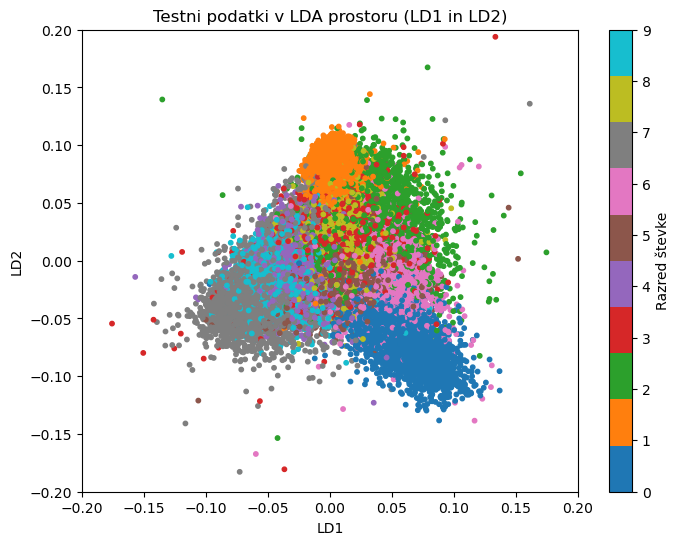

In [37]:
# uporabimo 9 komponent – največje smiselno število za LDA na 10 razredih
lda = LDA(n_components=9)
lda.fit(X_train, y_train)

# transformiramo testne podatke v LDA prostor
X_test_lda = lda.transform(X_test)

# vizualiziramo prvi dve komponenti
plt.figure(figsize=(8, 6))
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap='tab10', s=10)
plt.title("Testni podatki v LDA prostoru (LD1 in LD2)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.colorbar(label="Razred števke")
plt.show()

Vidimo, da imamo več različnih razredov zmešanih na istem območju, torej med njimi ne obstajajo tako jasne meje, vendar pa se to zdi smiselno, saj prihaja do prekrivanja npr. števk 7 in 9, 3, 5 in 8, ..., ki so si vizualno podobne.

2.f: Preveri točnost logistične regresije na originalnih podatki, podatkih, ki jih prej preslikaš v prostor nižje dimenzije z algoritmom LDA in podatkih, ki jih prej preslikaš v PCA prostor nižje dimenzije (enake dimenzije kot LDA).

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [39]:
# ORIGINALNI PODATKI
clf_orig = LogisticRegression(max_iter=1000)
clf_orig.fit(X_train, y_train)
y_pred_orig = clf_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)
print(f"Točnost na originalnih podatkih: {acc_orig:.4f}")

# LDA PROSTOR Z 9 KOMPONENTAMI
lda = LDA(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

clf_lda = LogisticRegression(max_iter=1000)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)
print(f"Točnost na LDA podatkih: {acc_lda:.4f}")

# PCA PROSTOR Z 9 KOMPONENTAMI
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Točnost na PCA podatkih: {acc_pca:.4f}")

Točnost na originalnih podatkih: 0.9040
Točnost na LDA podatkih: 0.8545
Točnost na PCA podatkih: 0.7894


Rezultati so kot po pričakovanjih:

- originalni podatki: pričakovana je najvišja točnost, ker imamo vseh 784 spremenljivk (torej celotno sliko)
- LDA: točnost je nekoliko nižja, a še vedno zelo visoka, glede na to, da uporabljamo le 9 dimenzij. LDA optimizira projekcijo tako, da maksimizira ločljivost med razredi, kar je zelo učinkovito za klasifikacijo. Majhen padec točnosti je logičen, saj izgubimo nekaj podrobnosti pri projekciji, vendar pa ohranimo bistveno strukturo med razredi. Še vseeno pa je rezultat super.
- PCA: ohranja dimenzije z največ variance, vendar ne ve, kaj so razredi, torej: najbolj spremenljivi piksli /= najbolj ločujoči piksli med števkami; zato je naravno, da je rezultat slabši kot pri LDA.

Vidimo prednost LDA pred PCA za klasifikacijsko nalogo. Originalni podatki so seveda najbolj informativni, ampak so dimenzijsko zahtevni, LDA pa ponuja dobro ravnovesje med kompaktnostjo in točnostjo.

2.g: Preveri še kako dobro lahko podatke iz LDA prostora preslikaš nazaj v originalen prostor. Slike, ki jih dobiš primerjaj z originalnimi in s slikami, ki jih dobiš ko podatke iz PCA prostora iste dimenzije preslikaš nazaj v originalen prostor.

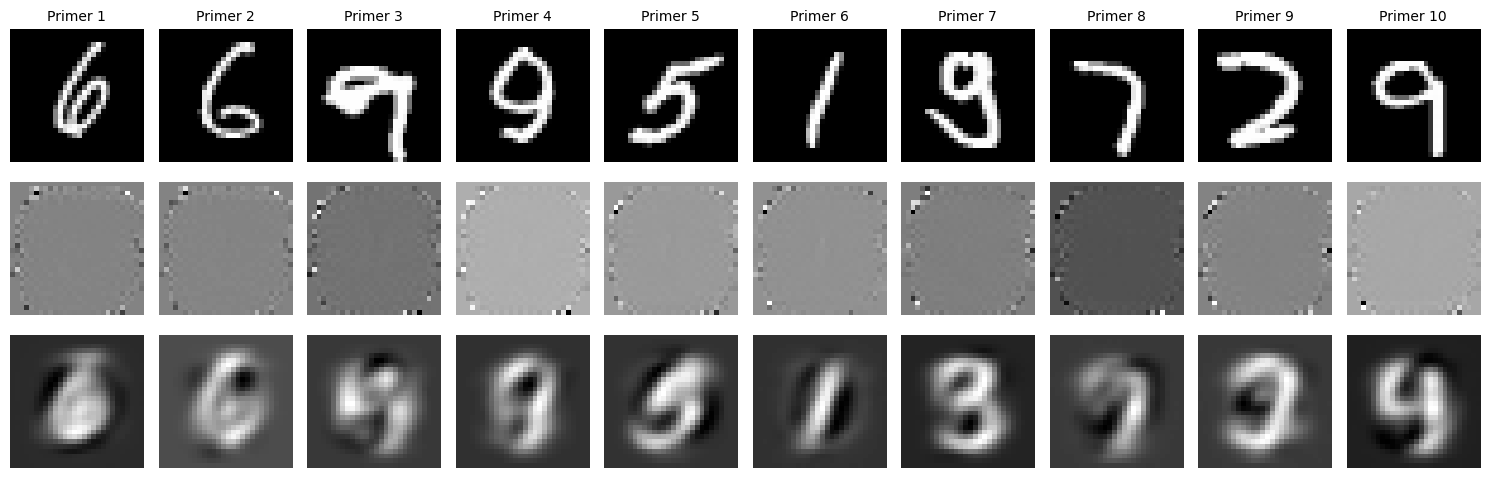

In [43]:
import matplotlib.pyplot as plt

# rekonstrukcija iz LDA prostora
X_test_lda = lda.transform(X_test)
X_test_reconstructed_lda = lda.inverse_transform(X_test_lda)

# rekonstrukcija iz PCA prostora
X_test_pca = pca.transform(X_test)
X_test_reconstructed_pca = pca.inverse_transform(X_test_pca)


n = 10  # število slik za prikaz
fig, axes = plt.subplots(nrows=3, ncols=n, figsize=(15, 5))

for i in range(n):
    # 1. VRSTICA: originalna slika
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel("Original", fontsize=12)
    axes[0, i].set_title(f"Primer {i+1}", fontsize=10)

    # 2. VRSTICA: rekonstrukcija iz LDA
    axes[1, i].imshow(X_test_reconstructed_lda[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel("LDA", fontsize=12)

    # 3. VRSTICA: rekonstrukcija iz PCA
    axes[2, i].imshow(X_test_reconstructed_pca[i].reshape(28, 28), cmap='gray')
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_ylabel("PCA", fontsize=12)

plt.tight_layout()
plt.show()


Kot pričakovano so LDA rekonstruirane slike zelo slabe, saj LDA ni zasnovan za rekonstrukcijo. LDA se namreč trudi ohraniti tiste informacije, ki ločujejo razrede, ostalo pa zanemari, saj za klasifikacijo ni pomembno. Torej ko rekonstruiramo, dobimo nazaj samo tisto, kar je pomagalo ločiti razrede, ne pa celotne slike.

PCA rekonstruirane slike so boljše, saj PCA ohranja največ variance = razlike med vzorci, torej ohrani splošno strukturo pikslov. Z ohranjanjem največjih komponent variance dobimo ohranjene oblike števk. Vendar pa tudi PCA rekonstruirane slike niso prav dobre, saj s tem, ko uporabimo samo 9 komponent od 784, izgubimo veliko podrobnosti, robovi postanejo zamegljeni, nekatere črte manjkajo...

2.h: Kdaj bi za krčenje razsežnosti podatkov uporabil PCA in kdaj LDA?

PCA bi uporabili, kadar je glavni cilj ohraniti čim več informacij (variance) iz podatkov brez upoštevanja razredov. PCA torej uporabimo, kadar:
- nimamo ciljne spremenljivke (nenadzorovano učenje, npr. vizualizacija, gručenje)
- želimo vizualizirati podatke, ne da bi vedeli, kaj je razred
- želimo zmanjšati dimenzijo pred uporabo modela, ki ni občutljiv na razredno strukturo
- delamo s podatki, kjer je vsaka dimenzija šum in želimo ohraniti le "močne vzorce".

LDA bi uporabili, ko želimo maksimalno ločiti razrede v podatkih (nadzorovana metoda). LDA torej uporabimo, kadar:
- imamo podatke z oznakami in želimo napovedati, v katerem razredu bodo točke
- želimo izboljšati klasifikacijo
- potrebujemo učinkovitejšo vizualizacijo klasifikacijskih razlik.

## Naloga 3: Modeliranje podatkovne množice

V datoteki "dn3.csv" je podana množica podatkov o študentih. Vaša naloga je sestaviti napovedni model, ki bo glede na smiselno metriko čim boljše napovedal ali je študent študij končal, ga še vedno opravlja, ali je s študijem prenehal (zadnji stolpec v podatkih).

Celoten postopek in vse poskuse (tudi neuspele) zabeleži in o njih poročaj. Podatkovna množica vsebuje naslednje spremenljivke:
- Zakonski stan: kategorični
- Vrsta vloge: kategoričen
- Vrstni red vloge: int
- Tečaj: kategoričen
- Prisotnost podnevi/zvečer: kategorična
- Prejšnja kvalifikacija: kategorična
- Prejšnja kvalifikacija (ocena): float
- Državljanstvo: kategorialno
- Materina Kvalifikcija: kategorična
- Očetova kvalifikacija: kategorična
- Poklic matere: kategoričen
- Poklic očeta: kategoričen
- Ocena pri vpisu: spremenljivka
- Preseljen: kategorično
- Posebne izobraževalne potrebe: kategorično
- Dolžnik: kategorično
- Šolnine do datuma: kategorično
- Spol: kategorično
- Zadnje tri številke študentske izkaznice: int
- Štipendist: kategorično
- Starost ob vpisu: int
- tujec: kategorično
- Učne enote 1. semester (priznane): int
- Učne enote 1. semestra (vpisane): int
- Učne enote 1. semester (ocene): int
- Učne enote 1. semester (odobrene): int
- Učne enote 1. semester (ocena): int
- Učne enote 1. semester (brez ocen): int
- Učne enote 2. semester (priznane): int
- Učne enote 2. semester (vpisane): int
- Učne enote 2. semester (ocene): int
- Učne enote 2. semester (odobrene): int
- Učne enote 2. semester (ocena): int
- Učne enote 2. semester (brez ocen): int
- Stopnja brezposelnosti: float
- Stopnja inflacije: float
- BDP: float
- Ciljna vrednost: kategoričen

 

In [130]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, f1_score
import matplotlib.pyplot as plt

1. UVOZ PODATKOV

In [131]:
# ločilo ";"
df = pd.read_csv("dn3.csv", sep=";")

# prikažemo osnovne informacije in prvih nekaj vrstic
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4341 non-null   float64
 1   Application mode                                4350 non-null   float64
 2   Application order                               4361 non-null   float64
 3   Course                                          4350 non-null   float64
 4   Daytime/evening attendance	                     4355 non-null   float64
 5   Previous qualification                          4360 non-null   float64
 6   Previous qualification (grade)                  4365 non-null   float64
 7   Nacionality                                     4365 non-null   float64
 8   Mother's qualification                          4368 non-null   float64
 9   Father's qualification                   

(None,
    Marital status  Application mode  Application order  Course  \
 0             1.0              17.0                5.0   171.0   
 1             1.0              15.0                1.0  9254.0   
 2             NaN               1.0                5.0  9070.0   
 3             1.0              17.0                2.0  9773.0   
 4             2.0              39.0                1.0  8014.0   
 
    Daytime/evening attendance\t  Previous qualification  \
 0                           1.0                     NaN   
 1                           1.0                     1.0   
 2                           1.0                     1.0   
 3                           1.0                     1.0   
 4                           0.0                     1.0   
 
    Previous qualification (grade)  Nacionality  Mother's qualification  \
 0                           122.0          1.0                    19.0   
 1                           160.0          1.0                     1.0   
 2

2. ČIŠČENJE IN KODIRANJE PODATKOV

MANJKAJOČE VREDNOSTI: odstranimo vrstice z manjkajočimi vrednostmi.

KODIRANJE KATEGORIJ: določimo, kateri stolpci so kategorični, in jih razdelimo na categorical_cols = tiste, ki jih bomo label-encodali in target_col = ciljna spremenljivka, ki jo encodamo posebej.

In [133]:
# odstranimo vrstice z manjkajočimi vrednostmi
df_clean = df.dropna()

# seznam kategoričnih stolpcev
categorical_cols = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]

target_col = 'Target'

# uporabimo LabelEncoder za vse kategorične stolpce
label_encoders = {}

for col in categorical_cols + [target_col]:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le


/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/4293503880.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/4293503880.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/4293503880.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

3. RAZDELITEV NA UČNE IN TESTNE PODATKE: npr. 80% podatkov za učno množico in preostalih 20% podatkov za ocenjevanje modela.

In [134]:
# neodvisne spremenljivke (vsi stolpci razen Target)
X = df_clean.drop(columns=['Target'])

# ciljna spremenljivka
y = df_clean['Target']

# razdelitev na učno in testno množico (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# stratify ohranja enako porazdelitev razredov v obeh množicah, kar je pomembno, če so razredi neuravnoteženi

4. UČENJE MODELA

In [135]:
# 1. Logistična regresija
lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("=== Logistična regresija ===")
print(f"Napaka (MSE): {mse_lr}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# 2. Odločitveno drevo
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("\n=== Odločitveno drevo ===")
print(f"Napaka (MSE): {mse}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 3. Naključni gozd
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\n=== Naključni gozd ===")
print(f"Napaka (MSE): {mse_rf}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

=== Logistična regresija ===
Napaka (MSE): 0.44509803921568625
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       161
           1       0.63      0.43      0.52        92
           2       0.79      0.92      0.85       257

    accuracy                           0.78       510
   macro avg       0.75      0.70      0.72       510
weighted avg       0.77      0.78      0.77       510


=== Odločitveno drevo ===
Napaka (MSE): 0.6450980392156863
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       161
           1       0.41      0.42      0.42        92
           2       0.77      0.77      0.77       257

    accuracy                           0.68       510
   macro avg       0.62      0.62      0.62       510
weighted avg       0.68      0.68      0.68       510


=== Naključni gozd ===
Napaka (MSE): 0.4725490196078431
Classifica

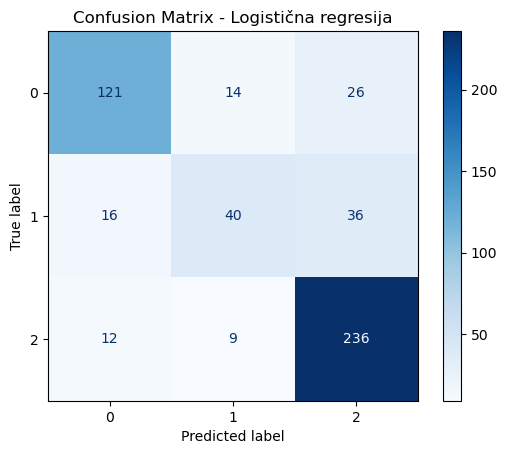

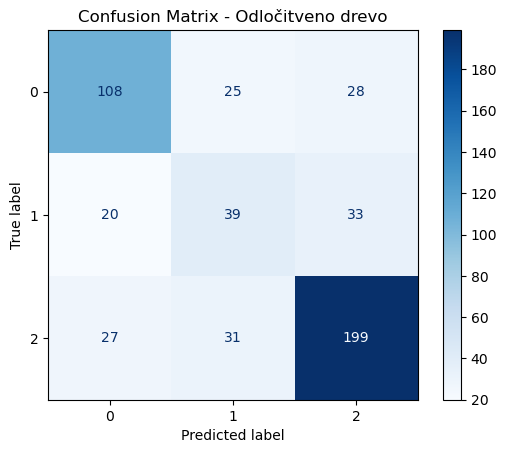

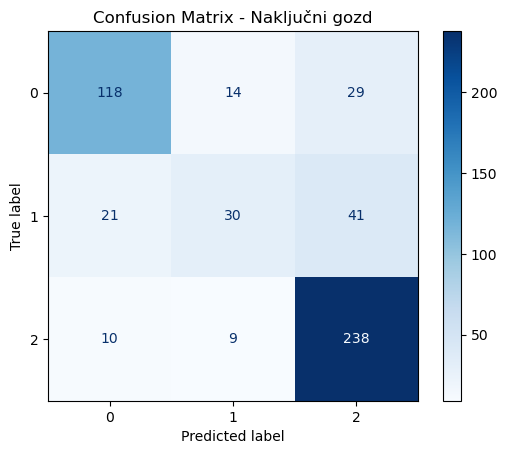

In [136]:
# Seznam modelov in njihovih napovedi
models = {
    "Logistična regresija": y_pred_lr,
    "Odločitveno drevo": y_pred,
    "Naključni gozd": y_pred_rf,
}

# Izris confusion matrixa za vsak model posebej
for model_name, y_pred_model in models.items():
    cm = confusion_matrix(y_test, y_pred_model)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.grid(False)
    plt.show()

Komentar confusion matrix-ov:
1. Logistična regresija: model lepo razpoznava razred 2, nekaj zamenjav pri razredu 1.
2. Odločitveno drevo: večja zmeda med razredi.
3. Naključni gozd: še vedno nekaj zamenjav, a razmeroma dobra razpoznavnost vseh razredov.

Rezultate lahko izboljšamo s:
- skaliranjem podatkov
- odstranitvijo slabih atributov (feature selection)
- uravnoteženjem razredov (razred 1 ima manj primerov in zato se ga modeli slabše naučijo)
- uporabo kompleksnejših modelov (npr. XGBoost)

1. SKALIRANJE

In [168]:
from sklearn.preprocessing import StandardScaler

# skaliranje podatkov
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ponovna delitev na učno in testno množico po skaliranju
X_train_scaled, X_test_scaled, y_train, y_test_s = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# lr
lr_s = LogisticRegression(max_iter=10000, random_state=42)
lr_s.fit(X_train_scaled, y_train)
y_pred_lr_s = lr_s.predict(X_test_scaled)
mse_lr_s = mean_squared_error(y_test_s, y_pred_lr_s)

print("\n=== Logistična regresija ===")
print(f"Napaka (MSE): {mse_lr_s}")
print("Classification Report:\n", classification_report(y_test_s, y_pred_lr_s))

# dt
dt_s = DecisionTreeClassifier(random_state=42)
dt_s.fit(X_train_scaled, y_train)
y_pred_dt_s = dt_s.predict(X_test_scaled)
mse_dt_s = mean_squared_error(y_test_s, y_pred_dt_s)

print("\n=== Odločitveno drevo ===")
print(f"Napaka (MSE): {mse_dt_s}")
print("Classification Report:\n", classification_report(y_test_s, y_pred_dt_s))

# rf
rf_s = RandomForestClassifier(random_state=42)
rf_s.fit(X_train_scaled, y_train)
y_pred_rf_s = rf_s.predict(X_test_scaled)
mse_rf_s = mean_squared_error(y_test_s, y_pred_rf_s)

print("\n=== Naključni gozd ===")
print(f"Napaka (MSE): {mse_rf_s}")
print("Classification Report:\n", classification_report(y_test_s, y_pred_rf_s))


=== Logistična regresija ===
Napaka (MSE): 0.4326797385620915
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       241
           1       0.61      0.38      0.47       138
           2       0.79      0.92      0.85       386

    accuracy                           0.78       765
   macro avg       0.74      0.69      0.70       765
weighted avg       0.76      0.78      0.76       765


=== Odločitveno drevo ===
Napaka (MSE): 0.6483660130718955
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67       241
           1       0.36      0.37      0.37       138
           2       0.77      0.78      0.77       386

    accuracy                           0.67       765
   macro avg       0.60      0.60      0.60       765
weighted avg       0.67      0.67      0.67       765


=== Naključni gozd ===
Napaka (MSE): 0.41830065359477125
Classific

In [157]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

# razlike skalirani modeli - originalni modeli
results_scaled_diff = {
    "Logistična regresija": {
        "Δ Accuracy": accuracy_score(y_test_s, y_pred_lr_s) - accuracy_score(y_test, y_pred_lr),
        "Δ MSE": mean_squared_error(y_test_s, y_pred_lr_s) - mean_squared_error(y_test, y_pred_lr),
        "Δ F1 (macro)": f1_score(y_test_s, y_pred_lr_s, average="macro") - f1_score(y_test, y_pred_lr, average="macro"),
        "Δ F1 (weighted)": f1_score(y_test_s, y_pred_lr_s, average="weighted") - f1_score(y_test, y_pred_lr, average="weighted"),
    },
    "Odločitveno drevo": {
        "Δ Accuracy": accuracy_score(y_test_s, y_pred_dt_s) - accuracy_score(y_test, y_pred),
        "Δ MSE": mean_squared_error(y_test_s, y_pred_dt_s) - mean_squared_error(y_test, y_pred),
        "Δ F1 (macro)": f1_score(y_test_s, y_pred_dt_s, average="macro") - f1_score(y_test, y_pred, average="macro"),
        "Δ F1 (weighted)": f1_score(y_test_s, y_pred_dt_s, average="weighted") - f1_score(y_test, y_pred, average="weighted"),
    },
    "Naključni gozd": {
        "Δ Accuracy": accuracy_score(y_test_s, y_pred_rf_s) - accuracy_score(y_test, y_pred_rf),
        "Δ MSE": mean_squared_error(y_test_s, y_pred_rf_s) - mean_squared_error(y_test, y_pred_rf),
        "Δ F1 (macro)": f1_score(y_test_s, y_pred_rf_s, average="macro") - f1_score(y_test, y_pred_rf, average="macro"),
        "Δ F1 (weighted)": f1_score(y_test_s, y_pred_rf_s, average="weighted") - f1_score(y_test, y_pred_rf, average="weighted"),
    }
}

# pretvori v df
df_scaled_diff = pd.DataFrame(results_scaled_diff).T

print("Razlike med skaliranimi in originalnimi modeli (skupaj s testnimi množicami):")
display(df_scaled_diff)

Razlike med skaliranimi in originalnimi modeli (skupaj s testnimi množicami):


,Δ Accuracy,Δ MSE,Δ F1 (macro),Δ F1 (weighted)
Logistična regresija,-0.003268,-0.012418,-0.014356,-0.006658
Odločitveno drevo,-0.099346,0.207190,-0.112947,-0.097163
Naključni gozd,0.024837,-0.054248,0.030812,0.025714


Interpretacija teh rezultatov:
- razlika med accuracy-jem originalnega in skaliranega modela je >0 => skaliranje izboljša model, saj je točnost skaliranega modela večja
- razlika med MSE-jem: >0 => skaliranje poslabša, saj je napaka skaliranega modela večja
- razlika v F1 (macro/weighted): >0 => skaliranje izboljša

2. ODSTRANITEV SLABIH ATRIBUTOV: npr. tistih, ki imajo preveč manjkajočih vrednosti, saj lahko odstranitev izkrivlja rezultate modela in povzroči, da model ignorira pomembne vzorce. Slab atribut tudi pomeni, da ima zelo nizko variabilnost, namreč če je atribut skoraj konstanten, potem se model iz tega ne mora naučiti nič koristnega. 

In [139]:
# 1. Delež manjkajočih vrednosti
nan_ratio = X.isna().mean()
high_nan_cols = nan_ratio[nan_ratio > 0.10].index.tolist()

# 2. Stolpci z nizko varianco
low_var_cols = X.std()[X.std() < 0.01].index.tolist()

# 3. Združi vse "slabe" atribute
cols_to_remove = list(set(high_nan_cols + low_var_cols))

# 4. Odstrani jih iz podatkov
X_reduced = X.drop(columns=cols_to_remove)

# 5. Izpiši, kaj smo odstranili
print("Odstranjeni atributi:")
for col in cols_to_remove:
    print(f" - {col}")
print(f"\nSkupaj odstranjenih: {len(cols_to_remove)}")

Odstranjeni atributi:

Skupaj odstranjenih: 0


Vidimo pa, da na podlagi teh kriterijev ne odstranimo nobenega stolpca, zato nadaljujemo s 3. poskusom.

3. URAVNOTEŽENJE RAZREDOV

In [149]:
!{sys.executable} -m pip install seaborn

In [150]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/2536101637.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/2536101637.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/2536101637.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from


=== Logistična regresija (SMOTE) ===
F1-score (weighted): 0.7477730684813485
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       161
           1       0.44      0.62      0.51        92
           2       0.84      0.80      0.82       257

    accuracy                           0.74       510
   macro avg       0.71      0.71      0.70       510
weighted avg       0.77      0.74      0.75       510



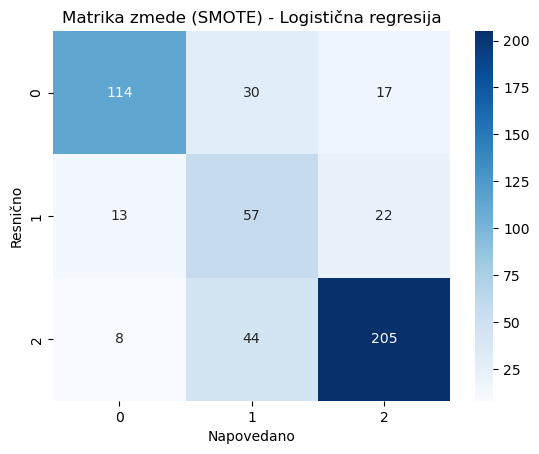


=== Odločitveno drevo (SMOTE) ===
F1-score (weighted): 0.6755434268667396
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       161
           1       0.38      0.41      0.39        92
           2       0.77      0.76      0.77       257

    accuracy                           0.67       510
   macro avg       0.62      0.62      0.62       510
weighted avg       0.68      0.67      0.68       510



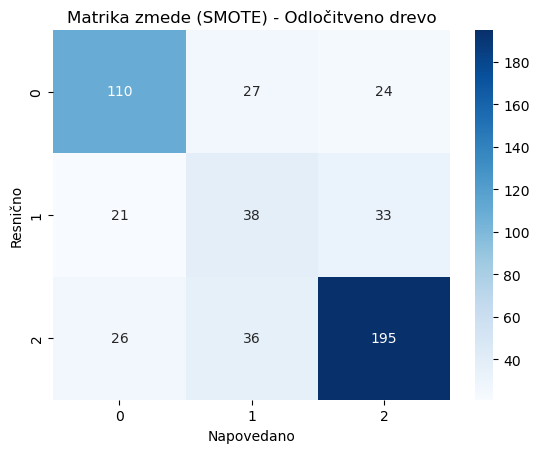


=== Naključni gozd (SMOTE) ===
F1-score (weighted): 0.762562848966624
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.77       161
           1       0.54      0.52      0.53        92
           2       0.80      0.88      0.84       257

    accuracy                           0.76       510
   macro avg       0.72      0.71      0.71       510
weighted avg       0.76      0.76      0.76       510



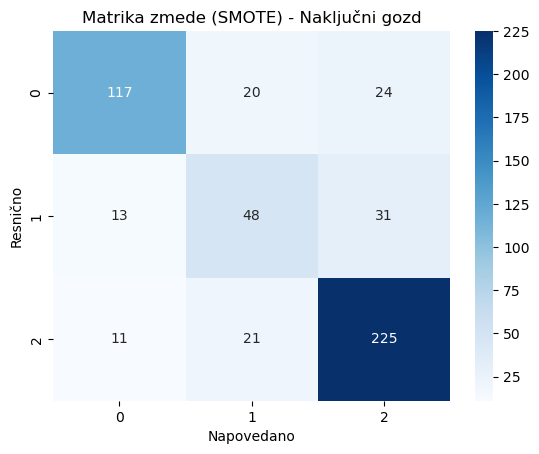

In [151]:
df_clean = df.dropna()

# kodiranje kategorij
categorical_cols = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]

target_col = 'Target'

label_encoders = {}
for col in categorical_cols + [target_col]:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# priprava X in y
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# razdelitev na učne in testne podatke
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# SMOTE uravnoteženje
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

models = {
    "Logistična regresija": LogisticRegression(max_iter=10000, random_state=42),
    "Odločitveno drevo": DecisionTreeClassifier(random_state=42),
    "Naključni gozd": RandomForestClassifier(random_state=42)
}

for ime, model in models.items():
    print(f"\n=== {ime} (SMOTE) ===")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    print("F1-score (weighted):", f1_score(y_test, y_pred, average="weighted"))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrika zmede (SMOTE) - {ime}")
    plt.xlabel("Napovedano")
    plt.ylabel("Resnično")
    plt.show()

Primerjamo originalne modele s SMOTE modeli. Da je vse lepo pregledno na enem mestu, še enkrat zapišemo, kaj so originalni in kaj SMOTE modeli.

In [152]:
df = pd.read_csv("dn3.csv", sep=";")
df_clean = df.dropna()

categorical_cols = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]
target_col = 'Target'

label_encoders = {}
for col in categorical_cols + [target_col]:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# originalni modeli
models_original = {
    "Logistična regresija": LogisticRegression(max_iter=10000, random_state=42),
    "Odločitveno drevo": DecisionTreeClassifier(random_state=42),
    "Naključni gozd": RandomForestClassifier(random_state=42)
}

results_original = {}
for name, model in models_original.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results_original[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred),
        "f1_weighted": f1_score(y_test, y_pred, average="weighted"),
        "f1_macro": f1_score(y_test, y_pred, average="macro")
    }

# SMOTE modeli
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

results_smote = {}
for name, model in models_original.items():  # isti modeli
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    results_smote[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred),
        "f1_weighted": f1_score(y_test, y_pred, average="weighted"),
        "f1_macro": f1_score(y_test, y_pred, average="macro")
    }

# razlike
df_diff = pd.DataFrame({
    name: {
        "Δ Accuracy": results_smote[name]["accuracy"] - results_original[name]["accuracy"],
        "Δ MSE": results_smote[name]["mse"] - results_original[name]["mse"],
        "Δ F1 (weighted)": results_smote[name]["f1_weighted"] - results_original[name]["f1_weighted"],
        "Δ F1 (macro)": results_smote[name]["f1_macro"] - results_original[name]["f1_macro"]
    }
    for name in results_original
}).T

print("Razlike med metrikami (SMOTE - original):")
display(df_diff)

/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/1029517524.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/1029517524.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/vb/594zlptd3xjcy2gqhk7nzxv40000gn/T/ipykernel_3142/1029517524.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Razlike med metrikami (SMOTE - original):


,Δ Accuracy,Δ MSE,Δ F1 (weighted),Δ F1 (macro)
Logistična regresija,-0.041176,-0.035294,-0.020332,-0.015793
Odločitveno drevo,-0.005882,-0.023529,-0.003418,-0.006223
Naključni gozd,0.007843,-0.031373,0.023046,0.041883


Poskusimo še z uporabo algoritma oz. metode XGBoost:

In [159]:
!{sys.executable} -m pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.6 MB/s eta 0:00:00a 0:00:01


In [164]:
from xgboost import XGBClassifier

/opt/anaconda3/envs/NSU25/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:32:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
F1-score (weighted): 0.7415423205556986
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74       161
           1       0.52      0.43      0.47        92
           2       0.78      0.90      0.84       257

    accuracy                           0.75       510
   macro avg       0.70      0.67      0.68       510
weighted avg       0.74      0.75      0.74       510



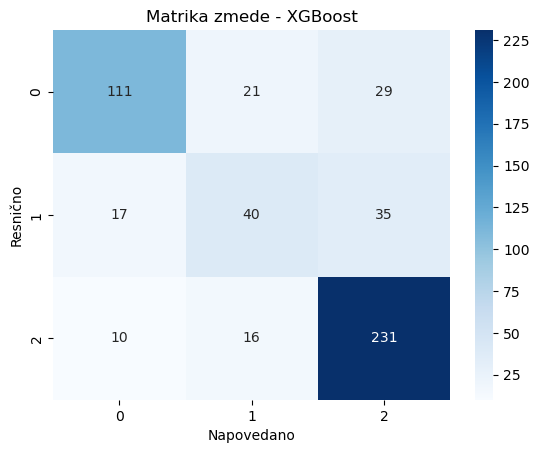

In [165]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_xgb)

print("=== XGBoost ===")
print("F1-score (weighted):", f1_score(y_test_xgb, y_pred_xgb, average="weighted"))
print("Classification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

cm = confusion_matrix(y_test_xgb, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrika zmede - XGBoost")
plt.xlabel("Napovedano")
plt.ylabel("Resnično")
plt.show()

Primerjamo še XGBoost z originalnimi modeli:

In [166]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_xgb)

results_all = {
    "Logistična regresija": {
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "MSE": mean_squared_error(y_test, y_pred_lr),
        "F1 (macro)": f1_score(y_test, y_pred_lr, average="macro"),
        "F1 (weighted)": f1_score(y_test, y_pred_lr, average="weighted")
    },
    "Odločitveno drevo": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "F1 (macro)": f1_score(y_test, y_pred, average="macro"),
        "F1 (weighted)": f1_score(y_test, y_pred, average="weighted")
    },
    "Naključni gozd": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "F1 (macro)": f1_score(y_test, y_pred_rf, average="macro"),
        "F1 (weighted)": f1_score(y_test, y_pred_rf, average="weighted")
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test_xgb, y_pred_xgb),
        "MSE": mean_squared_error(y_test_xgb, y_pred_xgb),
        "F1 (macro)": f1_score(y_test_xgb, y_pred_xgb, average="macro"),
        "F1 (weighted)": f1_score(y_test_xgb, y_pred_xgb, average="weighted")
    }
}

df_compare = pd.DataFrame(results_all).T
print("Primerjava originalnih modelov z XGBoost:")
display(df_compare)


/opt/anaconda3/envs/NSU25/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Primerjava originalnih modelov z XGBoost:


,Accuracy,MSE,F1 (macro),F1 (weighted)
Logistična regresija,0.778431,0.445098,0.715742,0.768105
Odločitveno drevo,0.764706,0.441176,0.714403,0.762563
Naključni gozd,0.756863,0.472549,0.672520,0.739517
XGBoost,0.749020,0.480392,0.684268,0.741542
